# IMPORTS

In [17]:
import os
import pandas as pd
import featuretools as ft
import numpy as np

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

pd.options.display.float_format = '{:.3f}'.format

# CONSTANTS

In [18]:
PARTNER_ID = 'BD01BAFAE73CF38C403978BBB458300C'

ALL_COLUMN_NAMES = ['Sale', 'SalesAmountInEuro', 'time_delay_for_conversion', 'click_timestamp',
                    'nb_clicks_1week', 'product_price', 'product_age_group', 'device_type', 'audience_id', 
                    'product_gender', 'product_brand','product_category(1)', 'product_category(2)',
                    'product_category(3)', 'product_category(4)','product_category(5)',
                    'product_category(6)', 'product_category(7)', 'product_country', 'product_id',
                    'product_title', 'partner_id', 'user_id']

CATEGORY_TYPE_COLUMN_NAMES = ['product_age_group', 'device_type', 'audience_id', 'product_gender', 'product_brand',
                       'product_category(1)', 'product_category(2)', 'product_category(3)', 'product_category(4)',
                       'product_category(5)', 'product_category(6)', 'product_category(7)',
                       'product_country', 'product_id', 'product_title', 'user_id']

NUMERICAL_TYPE_COLUMN_NAMES = ['SalesAmountInEuro', 'time_delay_for_conversion', 'click_timestamp', 'nb_clicks_1week', 'product_price']


CSV_PATH = f"CriteoSearchData_{PARTNER_ID}.csv"

# READ CSV, PREPROCESS THE DATA

In [19]:
if os.path.isfile(CSV_PATH):
    df_raw = pd.read_csv(f"CriteoSearchData_{PARTNER_ID}.csv", low_memory=False, usecols=ALL_COLUMN_NAMES)
    df_raw.drop(labels='partner_id', inplace=True, axis=1)
else:
    print('Sorry. You have to create an appropriate csv file first.')

### nans

In [56]:
df_raw = df_raw.replace('-1', np.NaN)
df_raw.replace(-1, np.NaN, inplace=True)
df_raw.click_timestamp = pd.to_datetime(df_raw.click_timestamp, unit='s', origin='unix')
df_raw['day'] = df_raw.click_timestamp.dt.date
df_raw = df_raw.query("Sale == 1")
df_raw.head()

,Sale,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,product_price,product_age_group,device_type,audience_id,product_gender,...,product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,user_id,day
7,1,119.000,457035.000,2020-08-31 18:30:51,19.000,119.000,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,NaN,1B491180398E2F0390E6A588B3BCE291,...,555EE90CF6686FFF818AC7065AAB2773,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,8FC90755BEDEE269D93C74762BB98050,C83584C67375245584CEBF5DCE5BEE2D 4CAC88B2214CC...,F00C3CF902EA711CEF7725BA70975496,2020-08-31
12,1,53.000,457.000,2020-09-01 00:16:08,3.000,53.000,921B36149E5B081FD24450BFE2CE4430,7E56C27BFF0305E788DA55A029EC4988,NaN,1B491180398E2F0390E6A588B3BCE291,...,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,E6DE04B225277BCFDFABE346CBA3F3B6,778978F5CAC64EABEE0467CE76BC0CEC BBFC4AF224D2A...,9BB0A782C760A12F5D200295D596B164,2020-09-01
35,1,178.000,101671.000,2020-08-31 19:57:39,0.000,89.000,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,NaN,C45A9AC6D102ACAEEDF0D6F78636D84A,...,8A30BF8BD2B3E9D44D2938D42C387D2E,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,218E5A741B5295FA6F638094B9C6CB48,9067248AB2A47A69ED6A6EC415733353 3DD5CA5D4ABE5...,63C0975E39531216371698EC0B371F65,2020-08-31
41,1,103.000,986.000,2020-08-31 16:18:14,1.000,103.000,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,8247415DCC8AE375E776F20F07617884,1B491180398E2F0390E6A588B3BCE291,...,C08050B58F54FA81F4580ECE15296698,067525A83E1875CB1828F4F9ADC752F6,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,D2E30A17A5F60F01CDA4E4F9E3437B09,02D83D1334A6C929960FC693F24445C9 59F9929C46340...,9238585AF6C8B818AD82B03FBAF80A4D,2020-08-31
52,1,173.000,585181.000,2020-08-30 23:10:47,305.000,173.000,88460293E9517D21E39AA889BD5AADC8,D7D1FB49049702BF6338894757E0D959,NaN,C45A9AC6D102ACAEEDF0D6F78636D84A,...,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,E8FDA53E4374F874915DFEBDBB07CC1A,F0D5D67EB388609ED73125E8258992AC 2EC1EED1871A1...,D07362B3AC1DEC11169FC194661EABBC,2020-08-30


### create categorical and numerical datasets

In [59]:
PRODUCT_INFO = ['product_age_group', 'device_type', 'audience_id', 'product_gender', 'product_brand',
                       'product_category(1)', 'product_category(2)', 'product_category(3)', 'product_category(4)',
                       'product_category(5)', 'product_category(6)', 'product_category(7)',
                       'product_country', 'product_id', 'product_title', 'product_price']
df_products = df_raw[PRODUCT_INFO]
df_products.drop_duplicates(subset=['product_id'], inplace=True)
df_products.head()

,product_age_group,device_type,audience_id,product_gender,product_brand,product_category(1),product_category(2),product_category(3),product_category(4),product_category(5),product_category(6),product_category(7),product_country,product_id,product_title,product_price
7,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,NaN,1B491180398E2F0390E6A588B3BCE291,EFF73087F003355BCA94C76DC3D3C167,033E492229C2222EFAA16EE8A6462D8B,3DCF45B664023887F9F2DDA616853C50,555EE90CF6686FFF818AC7065AAB2773,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,8FC90755BEDEE269D93C74762BB98050,C83584C67375245584CEBF5DCE5BEE2D 4CAC88B2214CC...,119.000
12,921B36149E5B081FD24450BFE2CE4430,7E56C27BFF0305E788DA55A029EC4988,NaN,1B491180398E2F0390E6A588B3BCE291,B950F965E4A65379D1C33A15B0BB0FC4,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,E6DE04B225277BCFDFABE346CBA3F3B6,778978F5CAC64EABEE0467CE76BC0CEC BBFC4AF224D2A...,53.000
35,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,NaN,C45A9AC6D102ACAEEDF0D6F78636D84A,7518C9F80AEBF7CB4FE6038A0EE9ED4A,033E492229C2222EFAA16EE8A6462D8B,77FFC91A6157E50A0A114135F18BB1DB,8A30BF8BD2B3E9D44D2938D42C387D2E,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,218E5A741B5295FA6F638094B9C6CB48,9067248AB2A47A69ED6A6EC415733353 3DD5CA5D4ABE5...,89.000
41,4C90FD52FC53D2C1C205844CB69575AB,D7D1FB49049702BF6338894757E0D959,8247415DCC8AE375E776F20F07617884,1B491180398E2F0390E6A588B3BCE291,04EB99EFF75EABD70EDF0D09274A2C22,033E492229C2222EFAA16EE8A6462D8B,77FFC91A6157E50A0A114135F18BB1DB,C08050B58F54FA81F4580ECE15296698,067525A83E1875CB1828F4F9ADC752F6,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,D2E30A17A5F60F01CDA4E4F9E3437B09,02D83D1334A6C929960FC693F24445C9 59F9929C46340...,103.000
52,88460293E9517D21E39AA889BD5AADC8,D7D1FB49049702BF6338894757E0D959,NaN,C45A9AC6D102ACAEEDF0D6F78636D84A,F0D5D67EB388609ED73125E8258992AC,033E492229C2222EFAA16EE8A6462D8B,CD599E5A946D00A81A875E085F7EF1E8,NaN,NaN,NaN,NaN,NaN,57A1D462A03BD076E029CF9310C11FC5,E8FDA53E4374F874915DFEBDBB07CC1A,F0D5D67EB388609ED73125E8258992AC 2EC1EED1871A1...,173.000


In [55]:
df_days = df_raw.groupby('day').agg({'Sale': 'size',
                                     'SalesAmountInEuro': ['mean', 'sum'],
                                     'time_delay_for_conversion': ['mean', 'sum'],
                                     'product_price': ['mean', 'sum']})

df_days.reset_index(inplace=True)
df_days.head()

day Sale SalesAmountInEuro          time_delay_for_conversion  \
              size              mean      sum                      mean   
0  2020-08-04    4           202.000  808.000                 29177.500   
1  2020-08-05   34           139.471 4742.000                161671.353   
2  2020-08-06   44           184.227 8106.000                422781.591   
3  2020-08-07   62           102.419 6350.000                160834.161   
4  2020-08-08   68           116.647 7932.000                314288.765   

               product_price           
           sum          mean      sum  
0   116710.000       129.500  518.000  
1  5496826.000       124.588 4236.000  
2 18602390.000       120.818 5316.000  
3  9971718.000        94.742 5874.000  
4 21371636.000        93.029 6326.000

In [54]:
df_users = df_raw.groupby('user_id').agg({'Sale': 'size',
                                         'SalesAmountInEuro': ['mean', 'sum'],
                                         'time_delay_for_conversion': ['mean', 'sum'],
                                         'product_price': ['mean', 'sum']})

df_users.reset_index(inplace=True)
df_users.head()

user_id Sale SalesAmountInEuro           \
                                    size              mean      sum   
0  0030ED3E019C70E449D02F446DCEBD34    2           190.000  380.000   
1  0032CF49567288C789A1C5113D7B7220    2            80.000  160.000   
2  004F8D1519F4D7CFE1D7C7C280706049    2           525.000 1050.000   
3  00631FEDDF5860F74EED841AFF9D6A39    2            90.000  180.000   
4  0082928B6A0C43936A57104A01BFB1C8    2           131.000  262.000   

  time_delay_for_conversion             product_price          
                       mean         sum          mean     sum  
0                  1643.000    3286.000       190.000 380.000  
1                  5496.000   10992.000        47.000  94.000  
2                702860.000 1405720.000        49.000  98.000  
3                 15075.000   30150.000        90.000 180.000  
4                  2593.000    5186.000       131.000 262.000

In [64]:
df_transactions = df_raw[['day', 'product_id', 'SalesAmountInEuro', 'time_delay_for_conversion',
                          'click_timestamp', 'nb_clicks_1week']]
df_transactions['transaction_id'] = np.arange(1, len(df_transactions)+1)
df_transactions.head()

,day,product_id,SalesAmountInEuro,time_delay_for_conversion,click_timestamp,nb_clicks_1week,transaction_id
7,2020-08-31,8FC90755BEDEE269D93C74762BB98050,119.000,457035.000,2020-08-31 18:30:51,19.000,1
12,2020-09-01,E6DE04B225277BCFDFABE346CBA3F3B6,53.000,457.000,2020-09-01 00:16:08,3.000,2
35,2020-08-31,218E5A741B5295FA6F638094B9C6CB48,178.000,101671.000,2020-08-31 19:57:39,0.000,3
41,2020-08-31,D2E30A17A5F60F01CDA4E4F9E3437B09,103.000,986.000,2020-08-31 16:18:14,1.000,4
52,2020-08-30,E8FDA53E4374F874915DFEBDBB07CC1A,173.000,585181.000,2020-08-30 23:10:47,305.000,5


# Create EntitySet

In [70]:
es = ft.EntitySet(id=PARTNER_ID)

## Adding dataframes

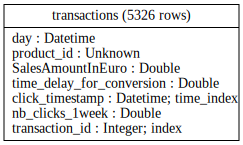

In [71]:
es = es.add_dataframe(
    dataframe_name="transactions",
    dataframe=df_transactions,
    index="transaction_id", # The index parameter specifies the column that uniquely identifies rows in the dataframe
)

es.plot()

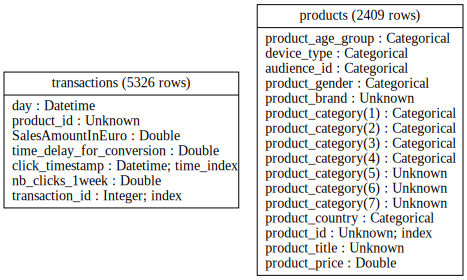

In [72]:
es = es.add_dataframe(
    dataframe_name="products",
    dataframe=df_products,
    index="product_id"
)

es.plot()

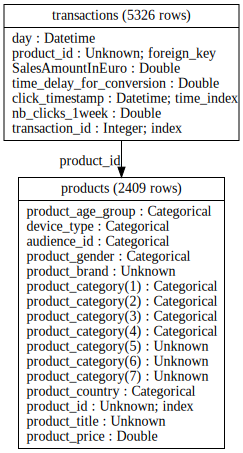

In [74]:
es = es.add_relationship("products", "product_id", "transactions", "product_id")

es.plot()